In [1]:
import numpy as np
import matplotlib.pyplot as plt

from toy_model import simulate_water_balance

# WBM equilibrium behavior?

In [2]:
############################################
# Select state for some typical values
name = "illinois"
############################################

T = np.loadtxt(f"./data/{name}_temperature.txt")
P = np.loadtxt(f"./data/{name}_precip.txt")
lai = np.loadtxt(f"./data/{name}_lai.txt")
Kc = np.loadtxt(f"./data/{name}_kc.txt")

# Select correct latitiude
# SD: [44,-98]
# IA: [42,-93]
# IL: [40,-89]
lat_dict = {"southdakota":44, "iowa":42, "illinois":40}
lat = lat_dict[name]

# Construct Kc timeseries outside growing season
def get_noGS_kc(t, lai):
    # Taken from WBM code (lines 1933, 5028 or search for KcMin) (no mention of this in docs)
    Kc_min = 0.2
    Kc_max = 1.1
    return Kc_min + (Kc_max - Kc_min) * (1 - np.exp(-0.7*lai))

Kc_final = [Kc[t] if Kc[t] > 0. else get_noGS_kc(t, lai[t]) for t in range(len(Kc))]

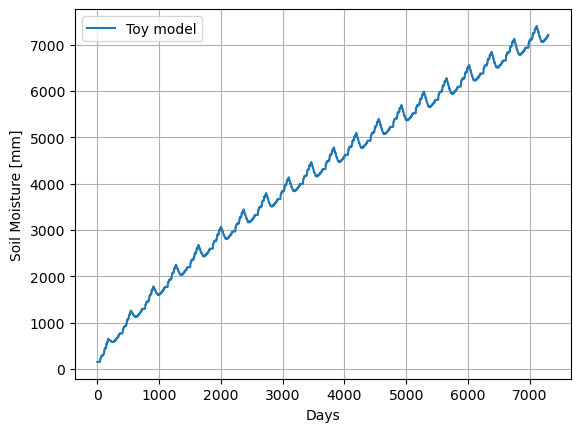

In [3]:
####################
# no HBV recharge 
####################
# Parameters
alpha = 5.         # Soil drying coefficient
Ts = -1.          # Snowfall threshold
Tm = 1.           # Snowmelt threshold
s_c = 0.4          # Crop-specific threshold factor
r_I = 0.9          # Irrigation inefficiency factor
r_FI = 0.9         # Framer irrigation inefficiency factor (added by David to test some things, in WBM r_FI = 1)
r_p = 0.5          # Runoff-percolation partitioning factor
beta_HBV = -1      # HBV direct recharge parameter (-1 to turn off)
gamma_S = 0.5      # Soil moisture surplus coefficient
gamma_G = 0.0167   # Groundwater leakage coefficient
phi = lat          # Latitude

# Initial conditions
Ws_init = 150           # Initial soil moisture: take from WBM
Wi_init = 0.5           # Canopy water storage
Sp_init = 0             # Snowpack
Wg_init = 100000.       # Groundwater

# No spinup
Ws, Ws_frac, Wg = simulate_water_balance(spinup=20,
                                        Ws_init = Ws_init,
                                        Wi_init = Wi_init,
                                        Sp_init = Sp_init,
                                        Wg_init = Wg_init,
                                        P = P, 
                                        T = T, 
                                        Wcap_in = [10000] * 365,
                                        Ts = Ts,
                                        Tm = Tm,
                                        lai = lai,
                                        Kc = Kc_final,
                                        alpha = alpha,
                                        s_c = s_c,
                                        r_I = r_I,
                                        r_FI = r_FI,
                                        r_p = r_p,
                                        beta_HBV = beta_HBV,
                                        gamma_S = gamma_S,
                                        gamma_G = gamma_G,
                                        phi=phi)

fig, ax = plt.subplots()

# soilMoist
ax.plot(Ws, label="Toy model")
ax.grid()
ax.set_ylabel("Soil Moisture [mm]")
ax.legend()
ax.set_xlabel("Days")
plt.show()

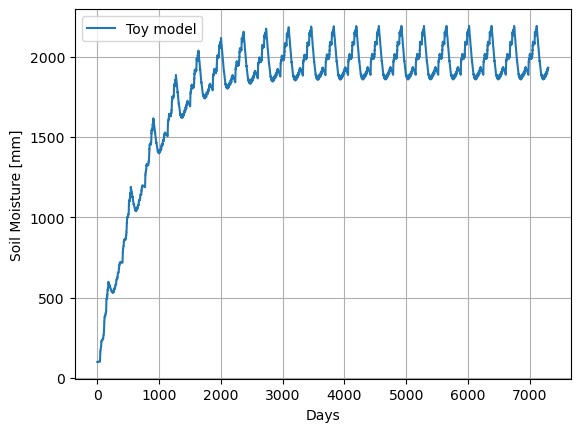

In [4]:
#############################################
# with unrealistically large HBV recharge 
#############################################
# Parameters
alpha = 5.         # Soil drying coefficient
Ts = -1.          # Snowfall threshold
Tm = 1.           # Snowmelt threshold
s_c = 0.4          # Crop-specific threshold factor
r_I = 0.9          # Irrigation inefficiency factor
r_FI = 0.9         # Framer irrigation inefficiency factor (added by David to test some things, in WBM r_FI = 1)
r_p = 0.5          # Runoff-percolation partitioning factor
beta_HBV = 3       # HBV direct recharge parameter (-1 to turn off)
gamma_S = 0.5      # Soil moisture surplus coefficient
gamma_G = 0.0167   # Groundwater leakage coefficient
phi = lat          # Latitude

# Initial conditions
Ws_init = 100           # Initial soil moisture
Wi_init = 0.5           # Canopy water storage
Sp_init = 0             # Snowpack
Wg_init = 100000.       # Groundwater

# No spinup
Ws, Ws_frac, Wg = simulate_water_balance(spinup=20,
                                        Ws_init = Ws_init,
                                        Wi_init = Wi_init,
                                        Sp_init = Sp_init,
                                        Wg_init = Wg_init,
                                        P = P, 
                                        T = T, 
                                        Wcap_in = [10000] * 365,
                                        Ts = Ts,
                                        Tm = Tm,
                                        lai = lai,
                                        Kc = Kc_final,
                                        alpha = alpha,
                                        s_c = s_c,
                                        r_I = r_I,
                                        r_FI = r_FI,
                                        r_p = r_p,
                                        beta_HBV = beta_HBV,
                                        gamma_S = gamma_S,
                                        gamma_G = gamma_G,
                                        phi=phi)

fig, ax = plt.subplots()

# soilMoist
ax.plot(Ws, label="Toy model")
ax.grid()
ax.set_ylabel("Soil Moisture [mm]")
ax.legend()
ax.set_xlabel("Days")
plt.show()